### Jacob Kopec and Nico Morys

### The purpose of this code is to answer our third question.

#### Question 3. What is the average gross earnings from each audience rating category?

In [1]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
#Open csv files
IMDbHG = pd.read_csv("IMDbHG_raw.csv")

# Ensure gross_earnings is numeric
IMDbHG["gross_earnings"] = pd.to_numeric(IMDbHG["gross_earnings"], errors="coerce")

# Group by audience_rating and calculate the average gross earnings
average_gross_by_rating = (
    IMDbHG.groupby("audience_rating")["gross_earnings"]
    .mean()
    .reset_index()
    .rename(columns={"gross_earnings": "Average Gross Earnings"})
)

# Format the average gross earnings as decimals
average_gross_by_rating["Average Gross Earnings"] = average_gross_by_rating["Average Gross Earnings"].apply(lambda x: f"{x:,.2f}")

# Display
display(average_gross_by_rating)

,audience_rating,Average Gross Earnings
0,Approved,"219,417,169.67"
1,G,"421,884,190.52"
2,Not Rated,"332,437,084.00"
3,PG,"444,719,557.27"
4,PG-13,"481,537,507.33"
5,R,"328,890,330.34"
6,TV-MA,"584,184,448.67"
7,TV-PG,"240,646,355.00"
8,TV-Y7,"387,053,506.00"


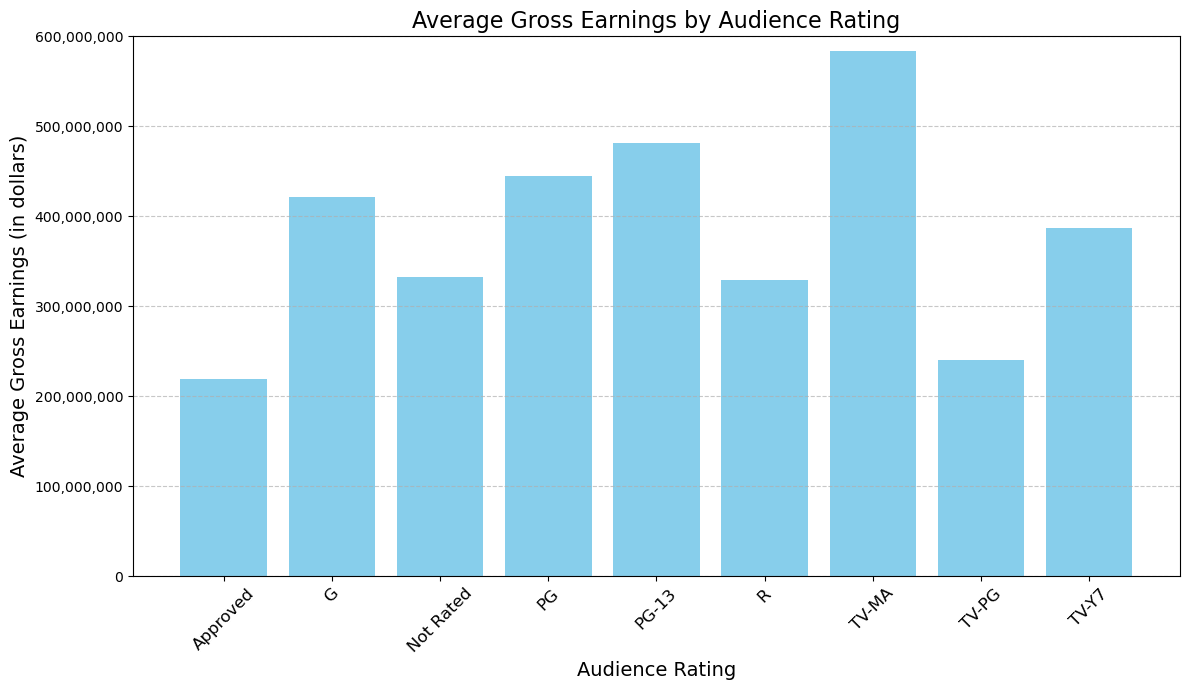

In [3]:
data = {
    "audience_rating": [
        "Approved", "G", "Not Rated", "PG", "PG-13", "R", "TV-MA", "TV-PG", "TV-Y7"
    ],
    "Average Gross Earnings": [
        219417169.67, 421884190.52, 332437084.00, 444719557.27,
        481537507.33, 328890330.34, 584184448.67, 240646355.00, 387053506.00
    ]
}
average_gross_by_rating = pd.DataFrame(data)

#Create bar graph
plt.figure(figsize=(12, 7))
plt.bar(
    average_gross_by_rating["audience_rating"],
    average_gross_by_rating["Average Gross Earnings"],
    color="skyblue"
)

# Change the plot
plt.title("Average Gross Earnings by Audience Rating", fontsize=16)
plt.xlabel("Audience Rating", fontsize=14)
plt.ylabel("Average Gross Earnings (in dollars)", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Remove scientific notation and format y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# Adjust y-axis scale
plt.ylim(0, 600_000_000)

# Display the plot
plt.tight_layout()
plt.show()